In [27]:
import seaborn as sns
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sqlalchemy import create_engine
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
DB_URI = "sqlite:///C:/Users/User/Desktop/MBD/Term2/PythonII/Group_Assignment/data/processed/database_energy.db"

engine = create_engine(DB_URI)

energy_df = pd.read_sql_table("final_data", engine)

#energy_df.set_index('date', inplace=True)

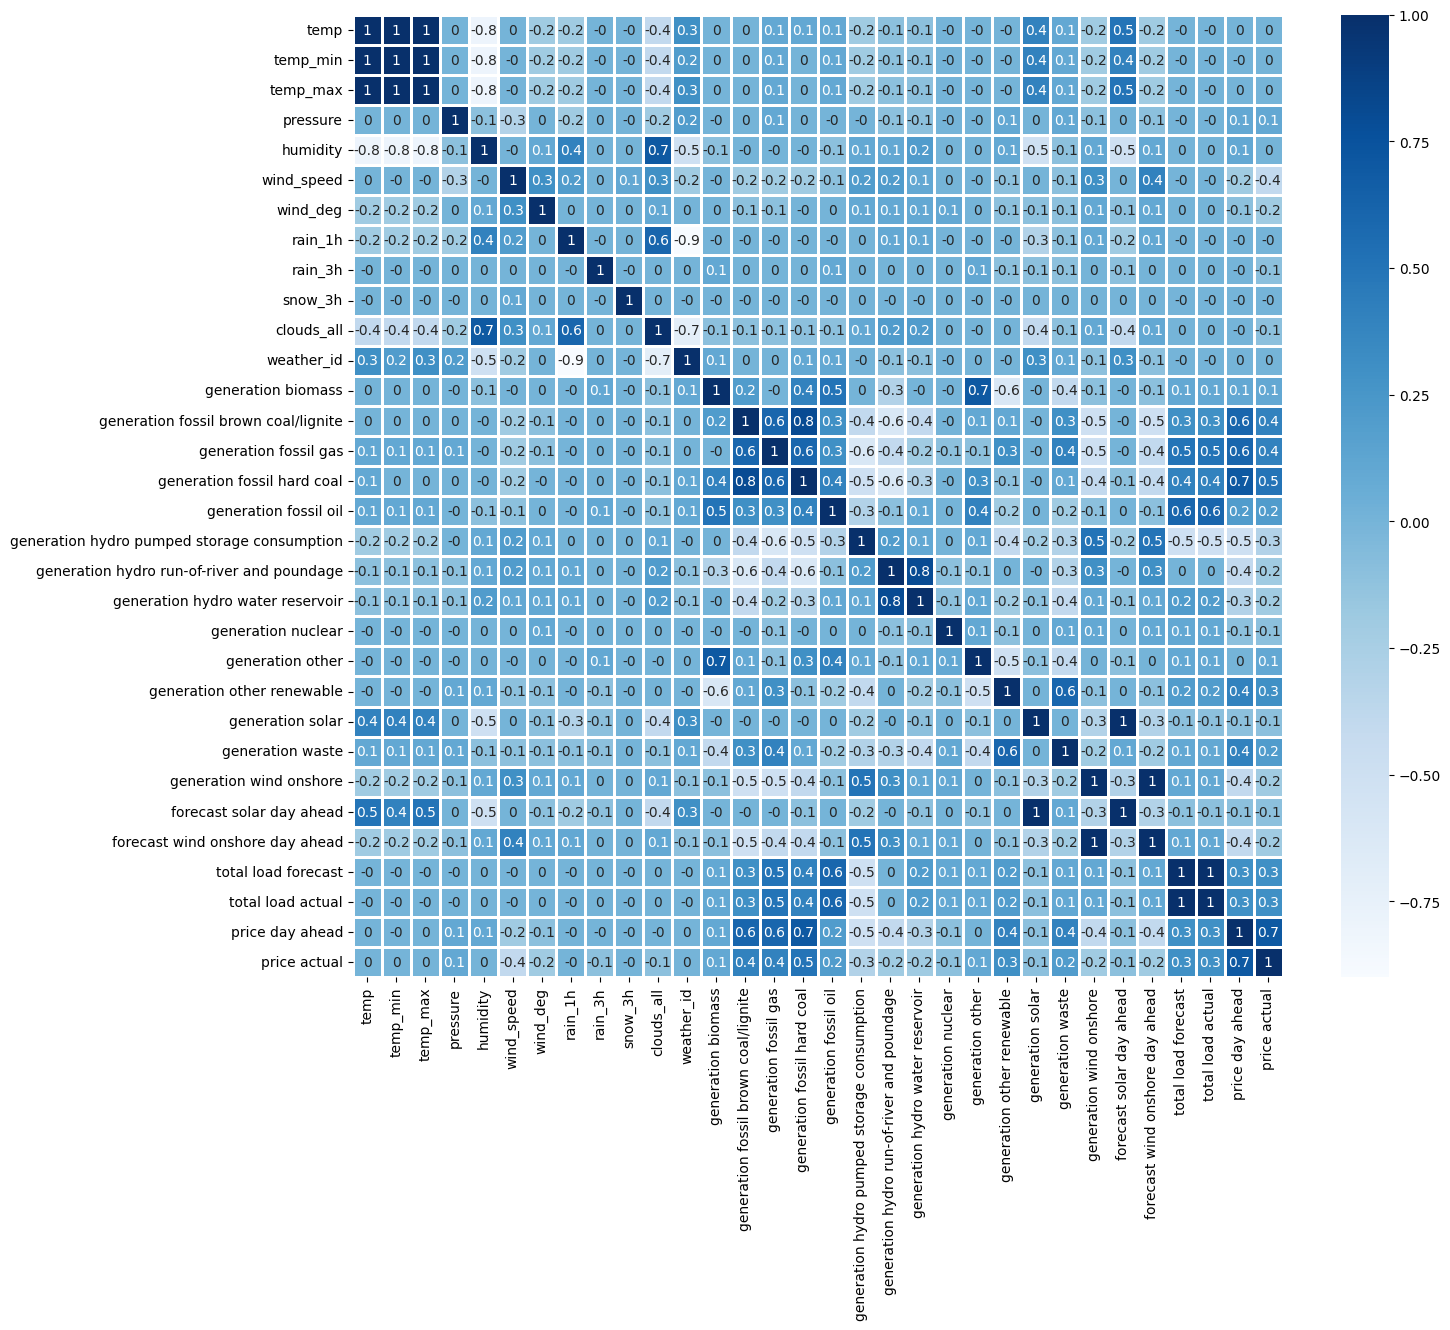

In [17]:
# Set Figure Size
features_cor = energy_df.iloc[:, 1:33]
plt.figure(figsize=(15,12.5))

# .corr heatmap of df to visualize correlation & show plot
sns.heatmap(round(features_cor.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show();

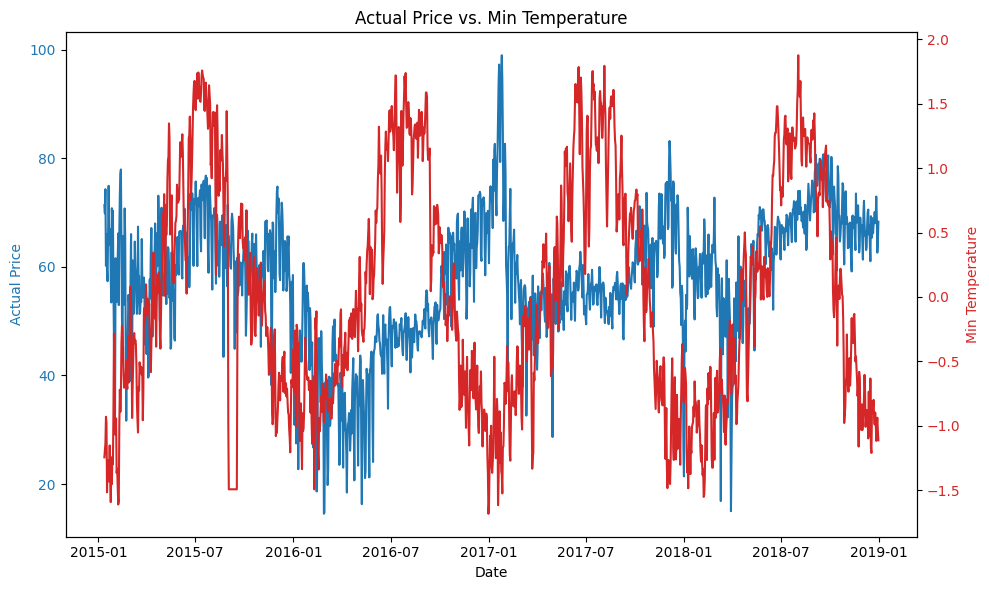

In [39]:
import matplotlib.pyplot as plt

# Variables
y = energy_df["price actual"]
x = energy_df["temp_min"]
date = energy_df["date"]

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the actual price on the first y-axis
ax1.plot(date, y, color='tab:blue', label="Actual Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Actual Price", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis (twin axis)
ax2 = ax1.twinx()

# Plot the min temperature on the second y-axis
ax2.plot(date, x, color='tab:red', label="Min Temperature")
ax2.set_ylabel("Min Temperature", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
plt.title("Actual Price vs. Min Temperature")
fig.tight_layout()
plt.show()


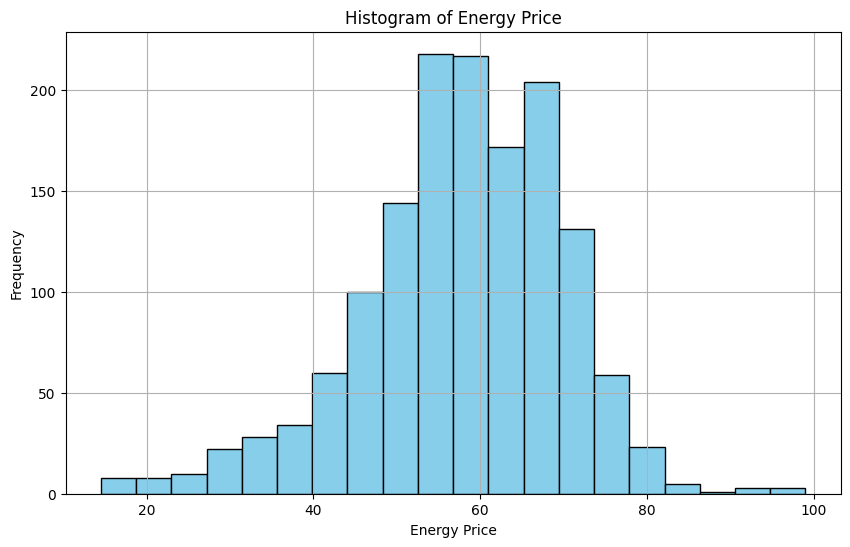

In [40]:
import matplotlib.pyplot as plt

# Assuming energy_df contains the original data

# Plotting histogram for variable Y
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Energy Price')
plt.xlabel('Energy Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [29]:
energy_df

,date,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,...,price(t-3),price(t-4),price(t-5),price(t-6),price(t-7),price(t-8),price(t-9),price(t-10),price(t-11),price(t-12)
0,2015-01-12,-1.360956,-1.246003,-1.425340,-3.834323,0.618409,-0.640074,-0.527120,-0.275725,-0.034384,...,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750,62.090833,65.410000
1,2015-01-13,-1.308956,-1.193256,-1.375231,-4.352342,0.603542,-0.565370,0.108218,-0.275725,-0.034384,...,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750,62.090833
2,2015-01-14,-1.254054,-1.137566,-1.322327,-4.405563,1.028090,-0.664975,0.468870,-0.275725,-0.034384,...,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750
3,2015-01-15,-1.050180,-0.930767,-1.125871,-1.294256,1.090864,0.430684,0.280495,0.355224,-0.034384,...,71.372917,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333
4,2015-01-16,-1.095299,-0.976534,-1.169348,-0.346128,1.160245,0.704599,0.783970,0.823043,-0.034384,...,69.841250,71.372917,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2018-12-27,-1.120551,-1.118220,-1.048623,0.955580,0.963664,-0.938890,0.224325,-0.275725,-0.034384,...,70.090000,67.996667,67.844839,66.231935,68.964615,65.381852,67.081667,69.334583,61.044516,64.608846
1446,2018-12-28,-0.992290,-0.997502,-0.920960,0.959128,0.535812,-0.590271,0.044513,-0.275725,-0.034384,...,68.065833,70.090000,67.996667,67.844839,66.231935,68.964615,65.381852,67.081667,69.334583,61.044516
1447,2018-12-29,-0.954566,-0.938282,-0.912305,1.108147,0.588674,-0.415962,-0.390120,-0.275725,-0.034384,...,69.054167,68.065833,70.090000,67.996667,67.844839,66.231935,68.964615,65.381852,67.081667,69.334583
1448,2018-12-30,-1.004012,-1.038501,-0.869030,1.186205,0.218640,-0.739679,-0.207910,-0.275725,-0.034384,...,72.959583,69.054167,68.065833,70.090000,67.996667,67.844839,66.231935,68.964615,65.381852,67.081667


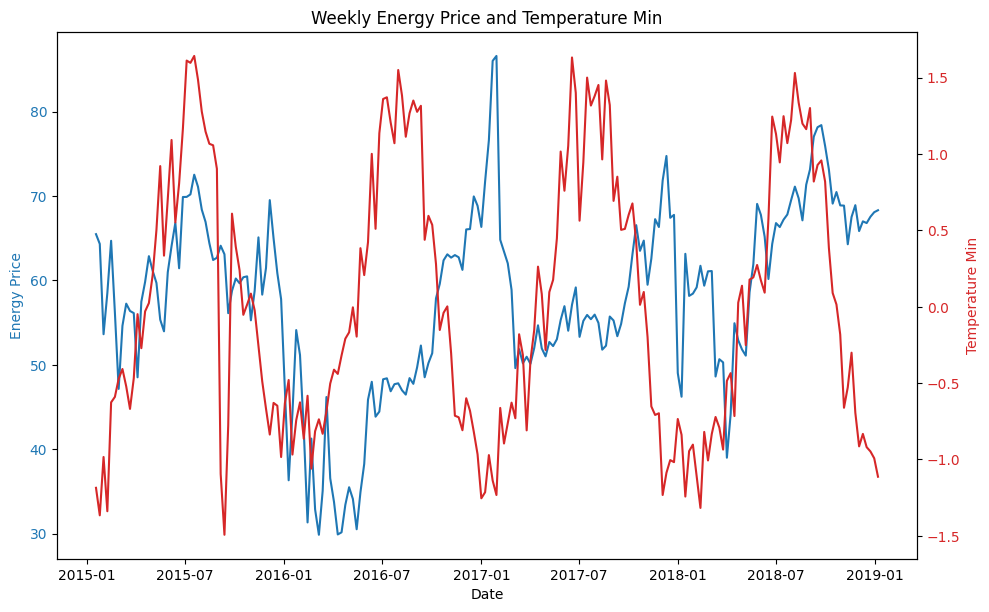

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming energy_df contains the original data

# Convert the date column to datetime if needed
energy_df['date'] = pd.to_datetime(energy_df['date'])

# Agrupar por semana y calcular la media
energy_df_weekly = energy_df.groupby(pd.Grouper(key='date', freq='W')).mean()

# Resetear el índice
energy_df_weekly.reset_index(inplace=True)

# Define x and y variables
x = energy_df_weekly['date']
y = energy_df_weekly["price actual"]
temp_min_weekly = energy_df_weekly["temp_min"]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Price', color=color)
ax1.plot(x, y, label="Energy Price", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Temperature Min', color=color)  
ax2.plot(x, temp_min_weekly, label="Temperature Min", color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Weekly Energy Price and Temperature Min')
plt.show()

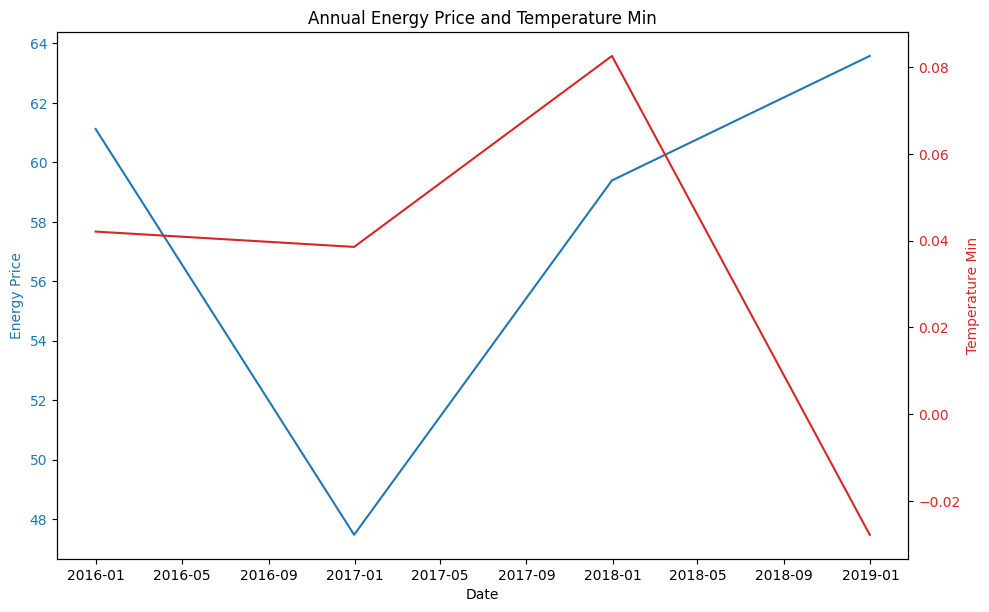

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming energy_df contains the original data

# Convert the date column to datetime if needed
energy_df['date'] = pd.to_datetime(energy_df['date'])

# Group by year and calculate the mean
energy_df_annual = energy_df.groupby(pd.Grouper(key='date', freq='Y')).mean()

# Reset the index
energy_df_annual.reset_index(inplace=True)

# Define x and y variables
x = energy_df_annual['date']
y = energy_df_annual["price actual"]
temp_min_annual = energy_df_annual["temp_min"]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Price', color=color)
ax1.plot(x, y, label="Energy Price", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Temperature Min', color=color)  
ax2.plot(x, temp_min_annual, label="Temperature Min", color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Annual Energy Price and Temperature Min')
plt.show()


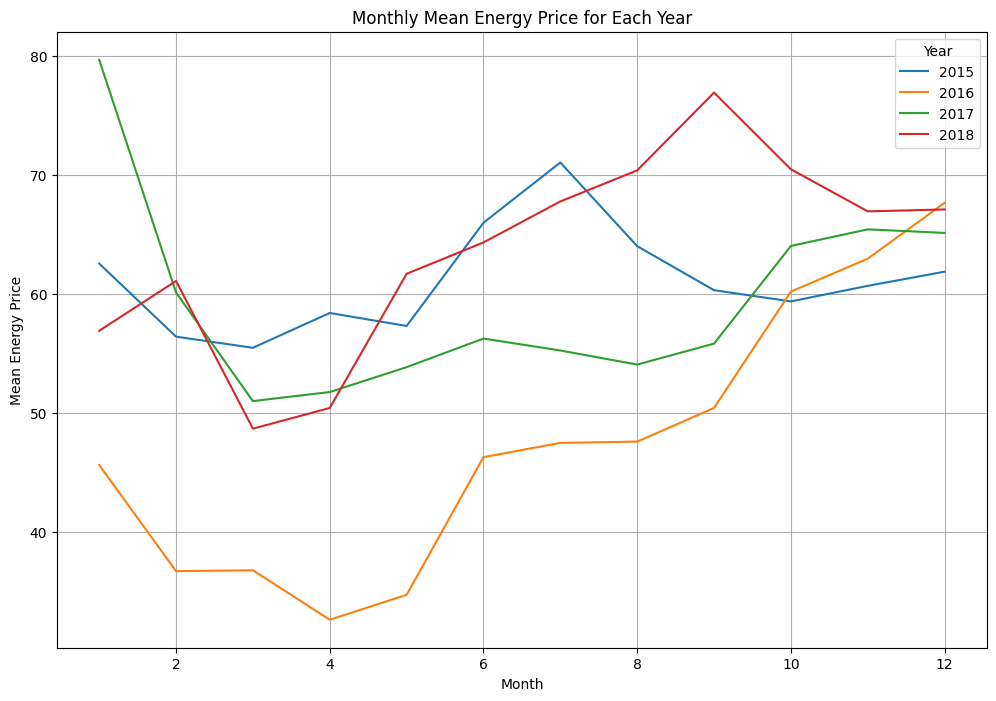

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming energy_df contains the original data

# Convert the date column to datetime if needed
energy_df['date'] = pd.to_datetime(energy_df['date'])

# Extract year and month from the date column
energy_df['year'] = energy_df['date'].dt.year
energy_df['month'] = energy_df['date'].dt.month

# Group by year and month, calculate the mean energy price
monthly_mean_price = energy_df.groupby(['year', 'month'])['price actual'].mean()

# Plotting
plt.figure(figsize=(12, 8))

# Plot monthly mean energy price for each year
for year in range(2015, 2019):
    monthly_mean_price[year].plot(label=str(year))

plt.title('Monthly Mean Energy Price for Each Year')
plt.xlabel('Month')
plt.ylabel('Mean Energy Price')
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [67]:
DB_URI = "sqlite:///C:/Users/User/Desktop/MBD/Term2/PythonII/Group_Assignment/data/processed/database_energy.db"
engine = create_engine(DB_URI)

def load_data():
    data = pd.read_sql_table("final_data", engine)
    return data


In [76]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_actual_price_vs_feature(data, feature, frequency):
    # Group data based on frequency
    if frequency == 'daily':
        pass  # No se realiza ningún agrupamiento
    elif frequency == 'weekly':
        data = data.groupby(pd.Grouper(key='date', freq='W')).mean().reset_index()
    elif frequency == 'yearly':
        data = data.groupby(pd.Grouper(key='date', freq='Y')).mean().reset_index()
    else:
        raise ValueError("Frequency should be 'daily', 'weekly', or 'yearly'.")

    # Variables
    y = data["price actual"]
    x = data["date"]
    feature_data = data[feature]

    # Create the figure and first y-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the actual price on the first y-axis
    ax1.plot(x, y, color='tab:blue', label="Actual Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Actual Price", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create the second y-axis (twin axis)
    ax2 = ax1.twinx()

    # Plot the feature on the second y-axis
    ax2.plot(x, feature_data, color='tab:red', label=feature)
    ax2.set_ylabel(feature, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add title and legend
    plt.title("Actual Price vs. " + feature)
    fig.tight_layout()
    plt.show()

# Example usage:
# data = load_data()  # Load your data
# plot_actual_price_vs_feature(data, 'temp_min', 'weekly')  # Plot the data

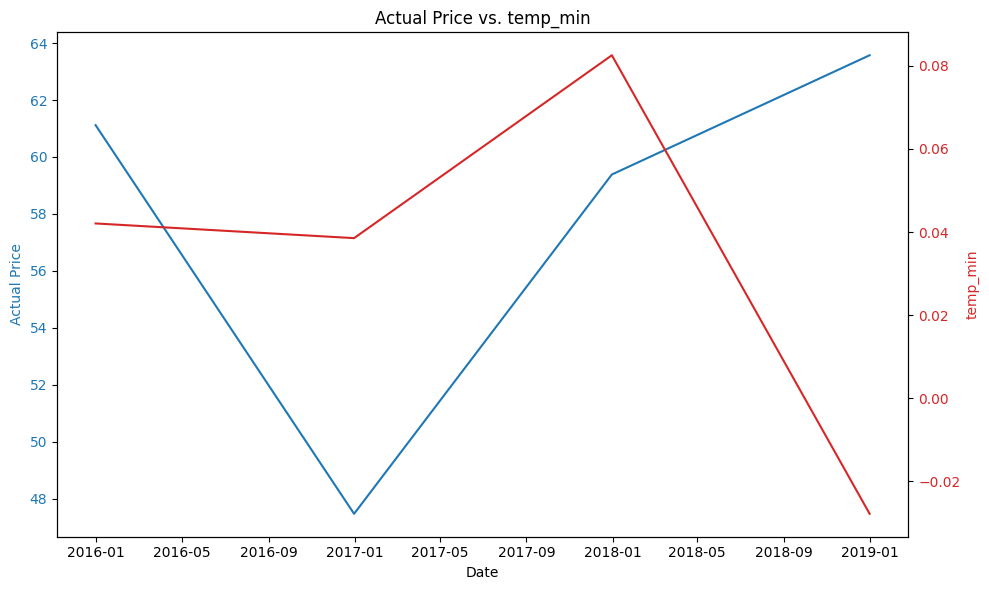

In [78]:
plot_actual_price_vs_feature(load_data(),'temp_min','yearly')